# 데이터 불러오기 (학습데이터와 테스트데이터 분류작업 실시)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np
import pandas as pd

train = pd.read_excel("review_ft.xlsx") # 학습데이터

train.shape

(42634, 14)

In [2]:
# 만들어진 데이터에는 null값이 존재하지 않음.
train.isnull().sum()

Product_Name    0
Review          0
Gender          0
Height          0
weight          0
Size            0
Length          0
Sholder         0
Chest           0
Sleeve          0
총장              0
어깨너비            0
가슴단면            0
소매길이            0
dtype: int64

C:\Users\bigca\AppData\Local\Temp\ipykernel_22868\140438991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender',data = train_ft,palette={'남성': 'blue', '여성': 'pink'})
C:\Users\bigca\AppData\Local\Temp\ipykernel_22868\140438991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender',data = test_ft,palette={'남성': 'blue', '여성': 'pink'})


([<matplotlib.axis.XTick at 0x148855dafe0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

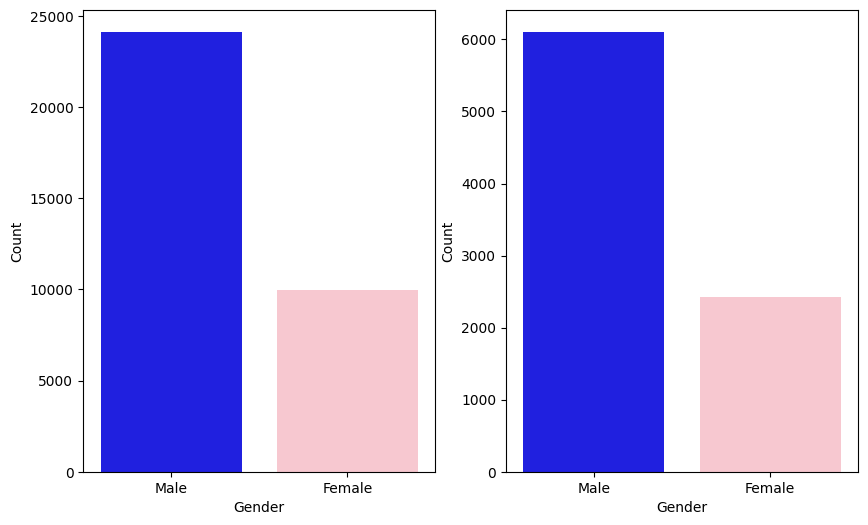

In [15]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Gender',data = train_ft,palette={'남성': 'blue', '여성': 'pink'})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

plt.subplot(1,2,2)
sns.countplot(x = 'Gender',data = test_ft,palette={'남성': 'blue', '여성': 'pink'})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

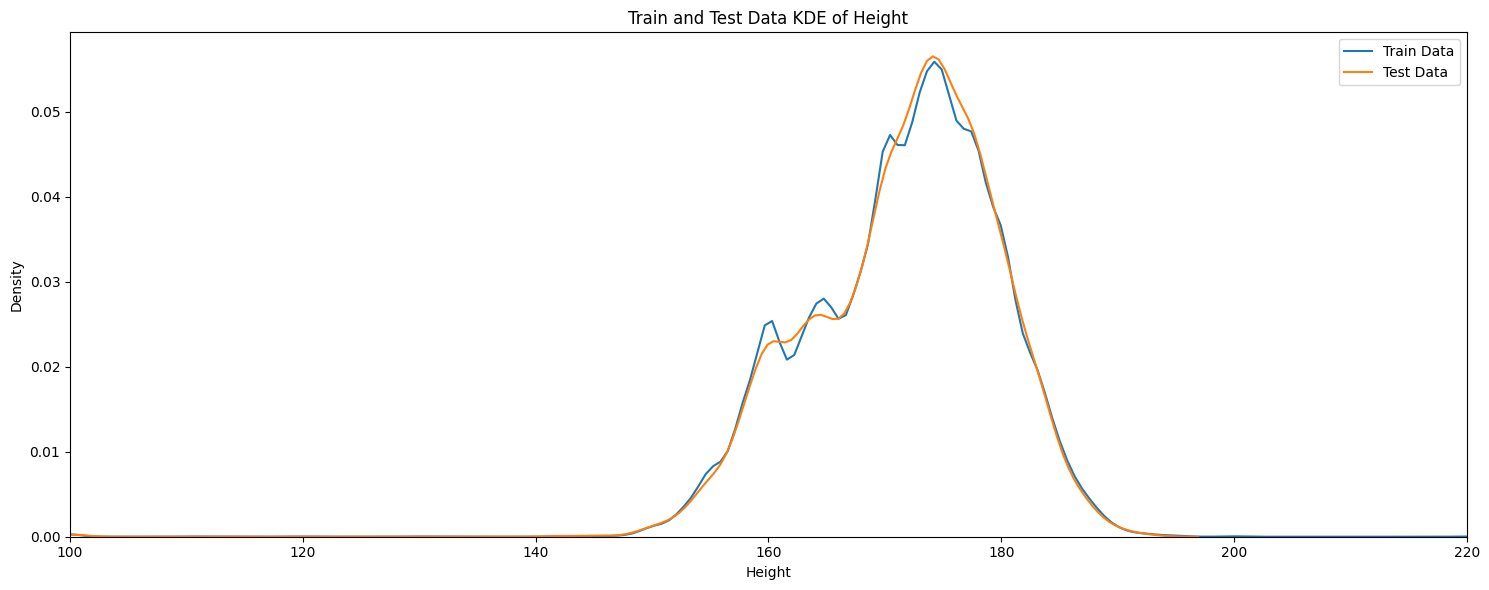

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='Height', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='Height', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('Height')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Height')
ax.set_xlim(train_ft['Height'].min(), train_ft['Height'].max())

plt.legend()
plt.tight_layout()
plt.show()

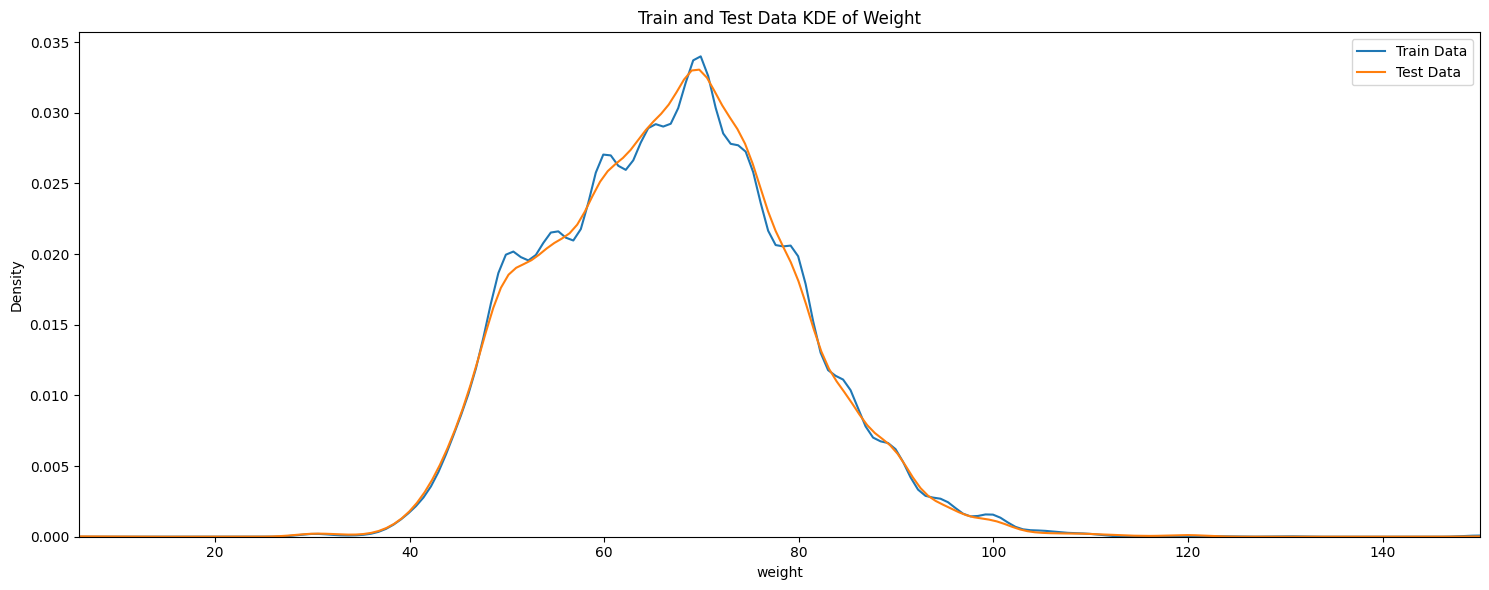

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='weight', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='weight', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('weight')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Weight')
ax.set_xlim(train_ft['weight'].min(), train_ft['weight'].max())

plt.legend()
plt.tight_layout()
plt.show()

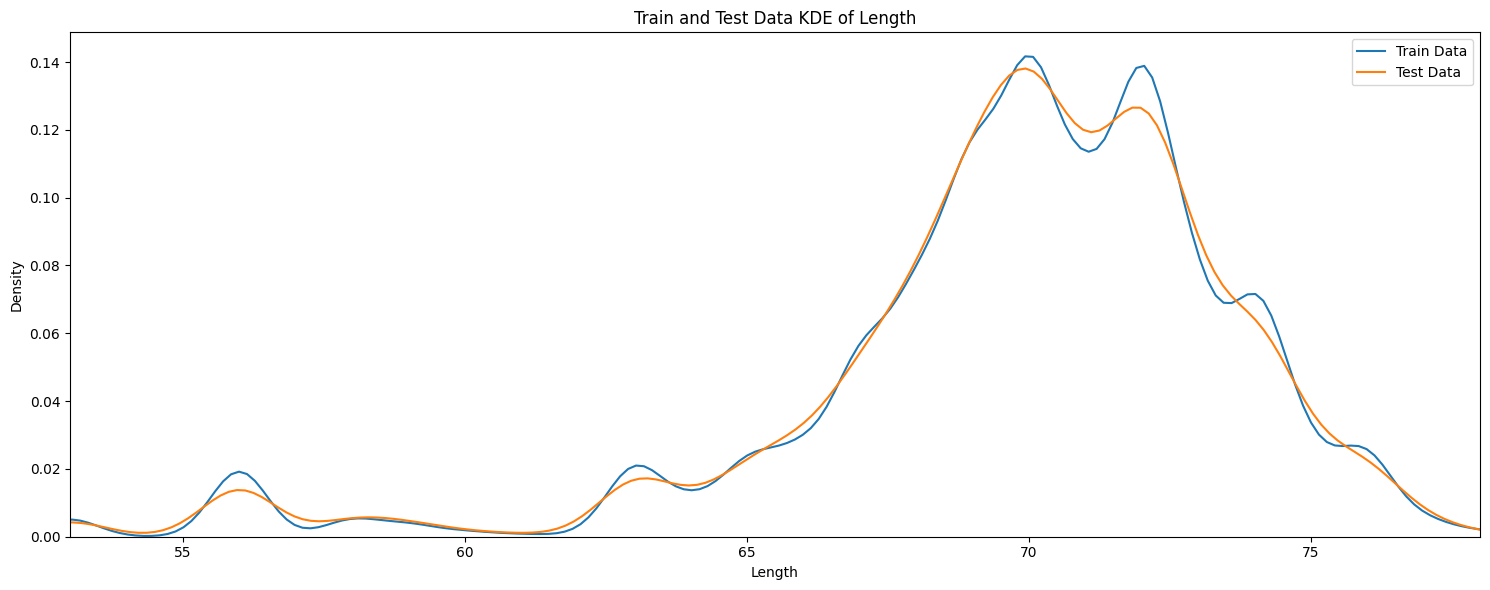

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='Length', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='Length', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('Length')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Length')
ax.set_xlim(train_ft['Length'].min(), train_ft['Length'].max())

plt.legend()
plt.tight_layout()
plt.show()

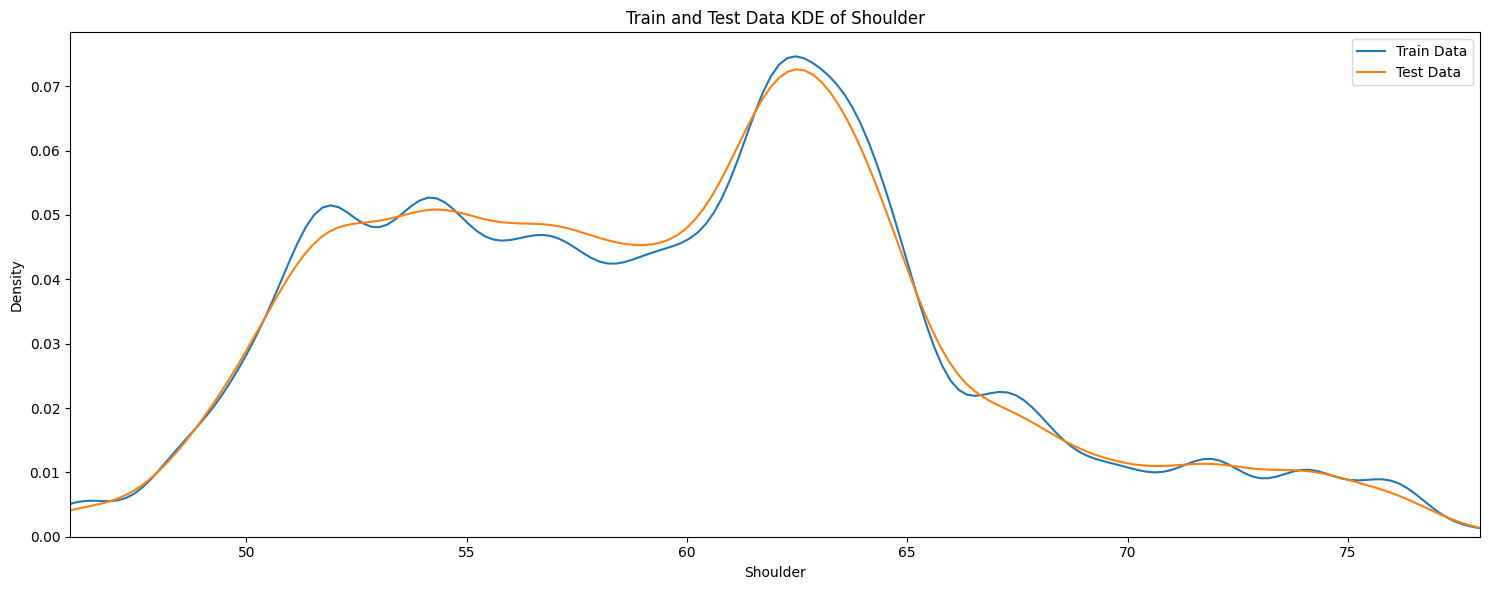

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='Sholder', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='Sholder', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('Shoulder')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Shoulder')
ax.set_xlim(train_ft['Sholder'].min(), train_ft['Sholder'].max())

plt.legend()
plt.tight_layout()
plt.show()

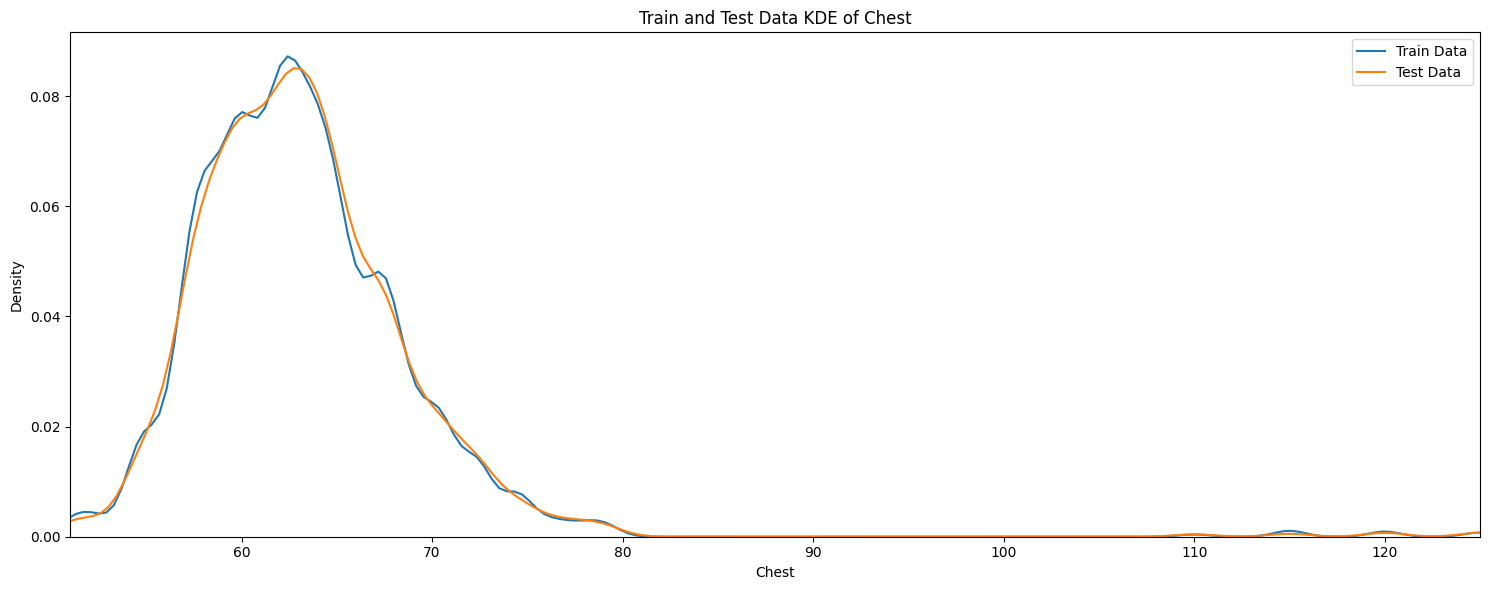

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='Chest', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='Chest', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('Chest')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Chest')
ax.set_xlim(train_ft['Chest'].min(), train_ft['Chest'].max())

plt.legend()
plt.tight_layout()
plt.show()

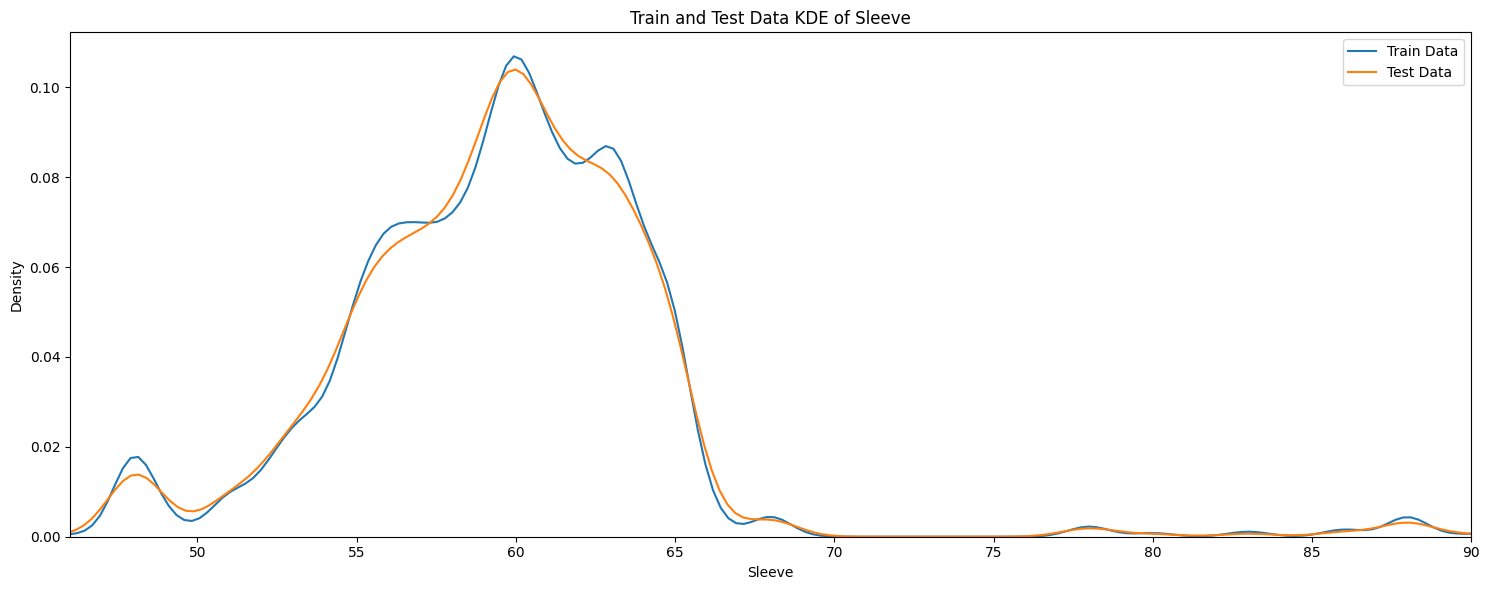

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(x='Sleeve', data=train_ft, ax=ax, label='Train Data')
sns.kdeplot(x='Sleeve', data=test_ft, ax=ax, label='Test Data')

ax.set_xlabel('Sleeve')
ax.set_ylabel('Density')
ax.set_title('Train and Test Data KDE of Sleeve')
ax.set_xlim(train_ft['Sleeve'].min(), train_ft['Sleeve'].max())

plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# 학습데이터와 테스트데이터 분류 작업 실시

from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)

train_data_frames = []
test_data_frames = []

for train_indices, test_indices in kf.split(train):
    train_fold = train.iloc[train_indices]
    test_fold = train.iloc[test_indices]
    train_data_frames.append(train_fold)
    test_data_frames.append(test_fold)

train_ft = train_data_frames[0]
test_ft = test_data_frames[0]

In [5]:
from scipy.stats import ks_2samp

ks_results = {feature: ks_2samp(train_ft[feature], test_ft[feature]) for feature in train_ft.columns}

for feature, result in ks_results.items():
    print(f"{feature}: KS Statistic = {result.statistic}, p-value = {result.pvalue}")
    
# 콜모고로프-스미르노프 테스트
# 두 데이터세트의 분포를 비교하는 비모수적 테스트 
# Gender,Height,weight,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이는 모두 유의수준 

Product_Name: KS Statistic = 0.011747836984119298, p-value = 0.30084648826740445
Review: KS Statistic = 0.009902276752791483, p-value = 0.5121436231238996
Gender: KS Statistic = 0.008598932898996381, p-value = 0.6907773269189874
Height: KS Statistic = 0.013059859435803345, p-value = 0.19328367095206933
weight: KS Statistic = 0.009069458006329578, p-value = 0.625310954695446
Size: KS Statistic = 0.004916350058590313, p-value = 0.9962787721139947
Length: KS Statistic = 0.009365929775653536, p-value = 0.5843167097088817
Sholder: KS Statistic = 0.01003427121228373, p-value = 0.4949470231796649
Chest: KS Statistic = 0.01050383699758417, p-value = 0.4360723218500161
Sleeve: KS Statistic = 0.009213572932366465, p-value = 0.6053209880018815
총장: KS Statistic = 0.0017891802909220725, p-value = 1.0
어깨너비: KS Statistic = 0.0008153652746377693, p-value = 1.0
가슴단면: KS Statistic = 0.00069819044941688, p-value = 1.0
소매길이: KS Statistic = 0.0008504854009599386, p-value = 1.0


In [4]:
# train_ft 수정작업 진행

train_ft.rename(columns = {'Sholder':'Shoulder'},inplace = True)
train_ft.rename(columns = {'weight':'Weight'},inplace = True)

train_ft.head()

C:\Users\bigca\AppData\Local\Temp\ipykernel_24216\2925125200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ft.rename(columns = {'Sholder':'Shoulder'},inplace = True)
C:\Users\bigca\AppData\Local\Temp\ipykernel_24216\2925125200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ft.rename(columns = {'weight':'Weight'},inplace = True)


,Product_Name,Review,Gender,Height,Weight,Size,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이
2,[코싸] koxa symbol mtm all 4color 맨투맨,정핏으로 나왔고요. 무난하니 이쁘네요. 추천해요,남성,178,61,L,72.0,48.0,55.0,68.0,0,0,0,0
3,[코싸] koxa symbol mtm all 4color 맨투맨,오버핏은 아니구 정핏입니다\n생각보가 깔끔하고 안에 입기 좋아요~,남성,174,62,L,72.0,48.0,55.0,68.0,0,0,0,0
5,[코싸] koxa symbol mtm all 4color 맨투맨,정핏으로 나왔고요. 무난하니 이쁘네요. 추천해요,남성,178,61,L,72.0,48.0,55.0,68.0,0,0,0,0
6,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,저 요즘 맨투맨에 빠져서 맨투맨 엄청찾다가 저렴해서 샀는데요 엄청 맘에드러요!! 일...,여성,155,40,M,66.0,58.0,59.0,62.0,1,1,1,1
8,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,배송은 엄청 빠르고 옷이 너무 크지도 작지고 않고 딱 적당해서 너무 좋은거 같고 색...,남성,168,60,M,66.0,58.0,59.0,62.0,0,0,0,0


In [5]:
# test_ft 수정작업 진행

test_ft.rename(columns = {'Sholder':'Shoulder'},inplace = True)
test_ft.rename(columns = {'weight':'Weight'},inplace = True)

test_ft.head()

C:\Users\bigca\AppData\Local\Temp\ipykernel_24216\2570567077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ft.rename(columns = {'Sholder':'Shoulder'},inplace = True)
C:\Users\bigca\AppData\Local\Temp\ipykernel_24216\2570567077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ft.rename(columns = {'weight':'Weight'},inplace = True)


,Product_Name,Review,Gender,Height,Weight,Size,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이
0,[코싸] koxa symbol mtm all 4color 맨투맨,오버핏은 아니구 정핏입니다\n생각보가 깔끔하고 안에 입기 좋아요~,남성,174,62,L,72.0,48.0,55.0,68.0,0,0,0,0
1,[코싸] koxa symbol mtm all 4color 맨투맨,선명하고\n길이도 품도\n다 잘 맞네요\n잘 입고다닙다.,남성,170,70,L,72.0,48.0,55.0,68.0,0,0,0,0
4,[코싸] koxa symbol mtm all 4color 맨투맨,선명하고\n길이도 품도\n다 잘 맞네요\n잘 입고다닙다.,남성,170,70,L,72.0,48.0,55.0,68.0,0,0,0,0
7,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,봄에 입기 적당한 두께이고 귀엽습니다. 잘 입을게요~~,남성,173,60,M,66.0,58.0,59.0,62.0,0,0,0,0
13,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,색이 뚜렷한 네이비고 이뻐요!! 그리고 사이즈가 조금 더 큰것 같기도 합니다!!,남성,176,62,M,66.0,58.0,59.0,62.0,1,1,1,1


# Feature engineering

In [6]:
import matplotlib.pyplot as plt

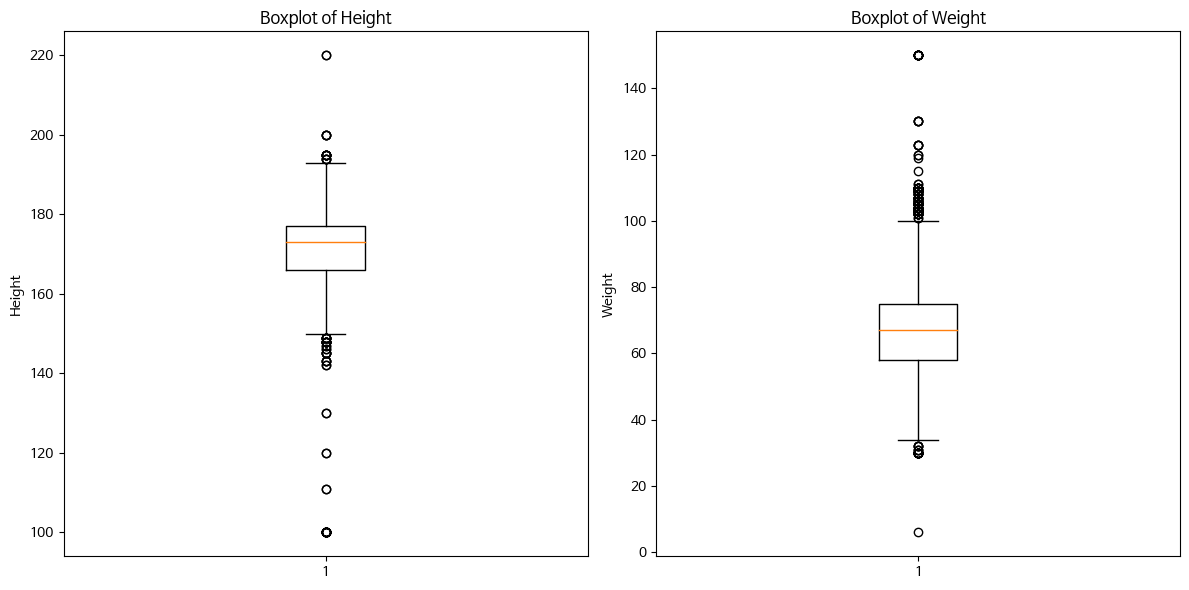

In [ ]:
# Height와 Weight의 이상치를 판별

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
plt.boxplot(train_ft['Height'])
plt.title('Boxplot of Height')
plt.ylabel('Height')

plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
plt.boxplot(train_ft['weight'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')

plt.tight_layout()  # subplot간의 간격을 조정합니다.
plt.show()

# 키의 경우에는 200이상, 120이하를 이상치로 판별
# 몸무게의 경우에는 130이상, 20 이하의 경우에는 이상치로 판별해주는 것이다.

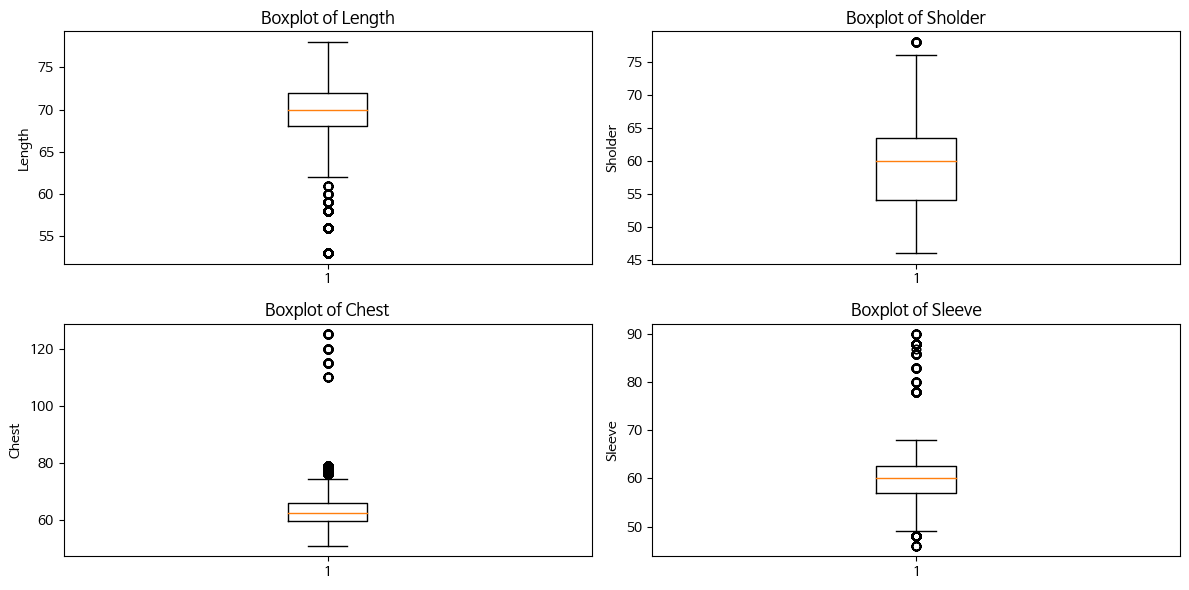

In [ ]:
# 총장, 어깨너비, 가슴단면, 소매길이의 이상치를 판별

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.boxplot(train_ft['Length'])
plt.title('Boxplot of Length')
plt.ylabel('Length')

plt.subplot(2, 2, 2)
plt.boxplot(train_ft['Sholder']) # 영어 철자 잘못됨
plt.title('Boxplot of Sholder')
plt.ylabel('Sholder')

plt.subplot(2, 2, 3)
plt.boxplot(train_ft['Chest'])
plt.title('Boxplot of Chest')
plt.ylabel('Chest')

plt.subplot(2, 2, 4)
plt.boxplot(train_ft['Sleeve'])
plt.title('Boxplot of Sleeve')
plt.ylabel('Sleeve')

plt.tight_layout()  # subplot간의 간격을 조정합니다.
plt.show()

# 총장의 길이는 57이하의 경우 이상치
# 어깨너비는 75보다 크게 된다고 한다면 이상치
# 가슴너비는 100이상의 경우에 이상치
# 소매길이는 83이상의 경우에 이상치

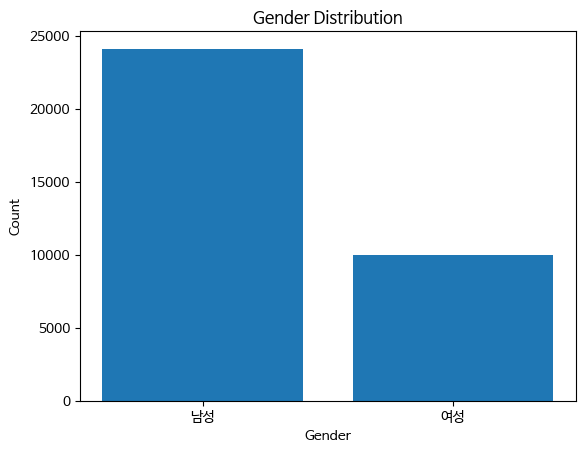

In [ ]:
import matplotlib.pyplot as plt

gender_counts = train_ft['Gender'].value_counts()

# Plotting
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

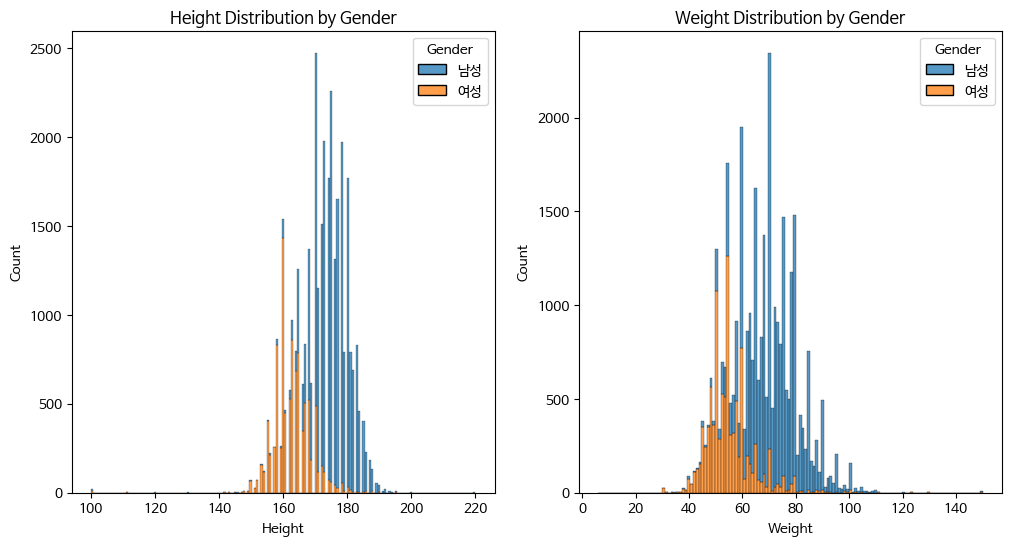

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot Height distribution
plt.subplot(1, 2, 1)
sns.histplot(data=train_ft, x='Height', hue='Gender', multiple="stack")
plt.title('Height Distribution by Gender')

# Plot Weight distribution
plt.subplot(1, 2, 2)
sns.histplot(data=train_ft, x='weight', hue='Gender', multiple="stack")
plt.xlabel('Weight')
plt.title('Weight Distribution by Gender')

plt.show()

In [7]:
agg_dict = {
    'Length' : 'mean',
    'Shoulder' : 'mean',
    'Chest' : 'mean',
    'Sleeve' : 'mean'
}

train_ft.groupby('Size').agg(agg_dict).reset_index()

,Size,Length,Shoulder,Chest,Sleeve
0,L,71.335740,60.097388,64.377060,60.691554
1,M,68.054347,59.676244,62.122927,58.793106
2,S,66.493133,56.510159,60.275691,57.149262
3,XL,73.277624,60.883153,66.146832,61.639384


# 전처리 작업 진행

In [8]:
train_ft = train_ft[~(train_ft['Height'] > 200) & ~(train_ft['Height'] < 120) &
                    ~(train_ft['Weight'] > 130) & ~(train_ft['Weight'] < 20) &
                    ~(train_ft['Length'] < 58) & ~(train_ft['Shoulder'] > 75) &
                    ~(train_ft['Chest'] > 100) & ~(train_ft['Sleeve'] > 83)].copy()

train_ft.shape

(31846, 14)

In [9]:
train_ft.reset_index(drop = True,inplace = True)

In [10]:
test_ft = test_ft[~(test_ft['Height'] > 200) & ~(test_ft['Height'] < 120) &
                  ~(test_ft['Weight'] > 130) & ~(test_ft['Weight'] < 20) &
                  ~(test_ft['Length'] < 58) & ~(test_ft['Shoulder'] > 75) &
                  ~(test_ft['Chest'] > 100) & ~(test_ft['Sleeve'] > 83)].copy()

test_ft.shape

(8002, 14)

In [11]:
test_ft.reset_index(drop = True,inplace = True)

In [12]:
# LabekEncoder 진행
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()

train_ft['New_Gender'] = le_Gender.fit_transform(train_ft['Gender'])

train_ft.drop(columns = ['Gender'],inplace = True)

train_ft.rename(columns = {'New_Gender':'Gender'},inplace = True)
train_ft.head()

,Product_Name,Review,Height,Weight,Size,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이,Gender
0,[코싸] koxa symbol mtm all 4color 맨투맨,정핏으로 나왔고요. 무난하니 이쁘네요. 추천해요,178,61,L,72.0,48.0,55.0,68.0,0,0,0,0,0
1,[코싸] koxa symbol mtm all 4color 맨투맨,오버핏은 아니구 정핏입니다\n생각보가 깔끔하고 안에 입기 좋아요~,174,62,L,72.0,48.0,55.0,68.0,0,0,0,0,0
2,[코싸] koxa symbol mtm all 4color 맨투맨,정핏으로 나왔고요. 무난하니 이쁘네요. 추천해요,178,61,L,72.0,48.0,55.0,68.0,0,0,0,0,0
3,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,저 요즘 맨투맨에 빠져서 맨투맨 엄청찾다가 저렴해서 샀는데요 엄청 맘에드러요!! 일...,155,40,M,66.0,58.0,59.0,62.0,1,1,1,1,1
4,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,배송은 엄청 빠르고 옷이 너무 크지도 작지고 않고 딱 적당해서 너무 좋은거 같고 색...,168,60,M,66.0,58.0,59.0,62.0,0,0,0,0,0


In [13]:
# LabekEncoder 진행 (test_ft)

test_ft['New_Gender'] = le_Gender.transform(test_ft['Gender'])

test_ft.drop(columns = ['Gender'],inplace = True)

test_ft.rename(columns = {'New_Gender':'Gender'},inplace = True)
test_ft.head()

,Product_Name,Review,Height,Weight,Size,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이,Gender
0,[코싸] koxa symbol mtm all 4color 맨투맨,오버핏은 아니구 정핏입니다\n생각보가 깔끔하고 안에 입기 좋아요~,174,62,L,72.0,48.0,55.0,68.0,0,0,0,0,0
1,[코싸] koxa symbol mtm all 4color 맨투맨,선명하고\n길이도 품도\n다 잘 맞네요\n잘 입고다닙다.,170,70,L,72.0,48.0,55.0,68.0,0,0,0,0,0
2,[코싸] koxa symbol mtm all 4color 맨투맨,선명하고\n길이도 품도\n다 잘 맞네요\n잘 입고다닙다.,170,70,L,72.0,48.0,55.0,68.0,0,0,0,0,0
3,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,봄에 입기 적당한 두께이고 귀엽습니다. 잘 입을게요~~,173,60,M,66.0,58.0,59.0,62.0,0,0,0,0,0
4,EMBROIDERY UNIVERSITY DAN CREWNECK NAVY,색이 뚜렷한 네이비고 이뻐요!! 그리고 사이즈가 조금 더 큰것 같기도 합니다!!,176,62,M,66.0,58.0,59.0,62.0,1,1,1,1,0


In [ ]:
# train_ft OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore')

col=['Gender','Size']

encoded_train=encoder.fit_transform(train_ft[col])

encoded_train_df = pd.DataFrame(encoded_train.toarray(), columns=encoder.get_feature_names_out(col))
train_ft = pd.concat([train_ft,encoded_train_df],axis=1)
train_ft.drop(['Gender','Size'],axis=1,inplace=True)

In [ ]:
# test_ft Encoder
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore')

col=['Gender','Size']

encoded_test=encoder.fit_transform(test_ft[col])

encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=encoder.get_feature_names_out(col))
test_ft = pd.concat([test_ft,encoded_test_df],axis=1)
test_ft.drop(['Gender','Size'],axis=1,inplace=True)
test_ft.columns

Index(['Product_Name', 'Review', 'Height', 'weight', 'Length', 'Sholder',
       'Chest', 'Sleeve', '총장', '어깨너비', '가슴단면', '소매길이', 'Gender_남성',
       'Gender_여성', 'Size_L', 'Size_M', 'Size_S', 'Size_XL'],
      dtype='object')

In [14]:
train_ft.shape, test_ft.shape

((31846, 14), (8002, 14))

In [15]:
train_ft.drop(columns = ['Product_Name','Review','Size'],inplace = True)
test_ft.drop(columns = ['Product_Name','Review','Size'],inplace = True)

train_ft.shape,test_ft.shape

((31846, 11), (8002, 11))

# pycaret을 이용한 모델

In [16]:
train_ft.head()

,Height,Weight,Length,Shoulder,Chest,Sleeve,총장,어깨너비,가슴단면,소매길이,Gender
0,178,61,72.0,48.0,55.0,68.0,0,0,0,0,0
1,174,62,72.0,48.0,55.0,68.0,0,0,0,0,0
2,178,61,72.0,48.0,55.0,68.0,0,0,0,0,0
3,155,40,66.0,58.0,59.0,62.0,1,1,1,1,1
4,168,60,66.0,58.0,59.0,62.0,0,0,0,0,0


In [17]:
# 학습데이터와 target데이터 분류

train_y_Length = train_ft['Length'].copy()
train_y_Shoulder = train_ft['Shoulder'].copy()
train_y_Chest = train_ft['Chest'].copy()
train_y_Sleeve = train_ft['Sleeve'].copy()

train_x = train_ft.iloc[:,[0,1,6,7,8,9,10]].copy()

In [18]:
# 테스트데이터와 target데이터 생성

test_y_length = test_ft['Length'].copy()
test_y_Shoulder = test_ft['Shoulder'].copy()
test_y_Chest = test_ft['Chest'].copy()
test_y_Sleeve = test_ft['Sleeve'].copy()

test_x = test_ft.iloc[:,[0,1,6,7,8,9,10]].copy()

In [73]:
from sklearn.preprocessing import RobustScaler

# 스케일러 초기화
scaler = RobustScaler()

# 트레인 데이터에 스케일링 적용
train_x_scaled = scaler.fit_transform(train_x)

# 테스트 데이터에 스케일링 적용
test_x_scaled = scaler.transform(test_x)

# 결과를 데이터프레임으로 변환 (옵션)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)

In [51]:
train_x_scaled.drop(columns = ['Chest'],inplace = True)

In [52]:
train_x_scaled['Sleeve']=train_ft['Sleeve']

In [74]:
train_x_scaled.shape

(31846, 7)

In [55]:
from pycaret.regression import *

reg = setup(data=train_x_scaled, target='Sleeve', session_id=123,
            use_gpu=True, # GPU 사용 활성화
            fold_strategy='kfold', # 교차 검증 전략
            fold=10) # 10겹 교차 검증

best_model = compare_models(n_select=6, include=['lightgbm', 'gbr', 'rf', 'et', 'ada', 'dt', 'knn', 'lr'],
                            cross_validation=True, sort='mse')

print(best_model)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Plus Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are

,Description,Value
0,Session id,123
1,Target,Sleeve
2,Target type,Regression
3,Original data shape,"(31846, 8)"
4,Transformed data shape,"(31846, 8)"
5,Transformed train set shape,"(22292, 8)"
6,Transformed test set shape,"(9554, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Plus Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.9446,14.8292,3.8492,0.0778,0.0627,0.0496,2.0790
gbr,Gradient Boosting Regressor,2.9535,14.9619,3.8665,0.0694,0.0630,0.0497,1.3900
rf,Random Forest Regressor,2.8916,14.9746,3.8681,0.0687,0.0630,0.0487,0.9010
lr,Linear Regression,2.9631,15.1223,3.8871,0.0595,0.0633,0.0499,0.0280
et,Extra Trees Regressor,2.8435,15.1916,3.8957,0.0553,0.0635,0.0478,0.6930
dt,Decision Tree Regressor,2.8752,15.6398,3.9528,0.0273,0.0644,0.0484,0.0600
knn,K Neighbors Regressor,3.1412,17.2221,4.1487,-0.0717,0.0676,0.0528,0.1120
ada,AdaBoost Regressor,3.2652,18.5326,4.3045,-0.1544,0.0707,0.0559,0.2890


[LGBMRegressor(device='gpu', n_jobs=-1, random_state=123), GradientBoostingRegressor(random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), LinearRegression(n_jobs=-1), ExtraTreesRegressor(n_jobs=-1, random_state=123), DecisionTreeRegressor(random_state=123)]


In [47]:
print(best_model[0])

LGBMRegressor(device='gpu', n_jobs=-1, random_state=123)


In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=123)

# pycaret을 이용하여 만들어진 모델 중에서 최고의 모델을 선정

In [31]:
# Length

rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=123)
scores = cross_val_score(rf_regressor, train_x_scaled.iloc[:,:-1], train_y_Length, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
np.sqrt(-scores.mean()) # 2.0788983447690734

2.470099074368389

In [32]:
# 테스트 데이터에 대해서도 성능을 평가해본다.

from sklearn.metrics import mean_squared_error

rf_regressor.fit(train_x_scaled.iloc[:,:-1], train_y_Length)
predictions = rf_regressor.predict(test_x_scaled)

np.sqrt(mean_squared_error(test_y_length,predictions)) # 2.030444831366074 성능이 괜찮게 나오는 것을 확인했음.

2.4275625424621867

In [40]:
# Shoulder

rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=123)
scores = cross_val_score(rf_regressor, train_x_scaled.iloc[:,:-1], train_y_Shoulder, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
np.sqrt(-scores.mean())

5.856760901821573

In [41]:
# 테스트 데이터에 대해서도 성능을 평가해본다.

rf_regressor.fit(train_x_scaled.iloc[:,:-1], train_y_Shoulder)
predictions = rf_regressor.predict(test_x_scaled)

np.sqrt(mean_squared_error(test_y_length,predictions)) # 11.733663311458656 성능이 괜찮게 나오는 것을 확인했음.

11.604559598734935

In [48]:
# Chest

rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=123)
scores = cross_val_score(rf_regressor, train_x_scaled.iloc[:,:-1], train_y_Chest, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
np.sqrt(-scores.mean()) # 4.13674659257896

4.3706272081436515

In [49]:
# 테스트 데이터에 대해서도 성능을 평가해본다.

rf_regressor.fit(train_x_scaled.iloc[:,:-1], train_y_Chest)
predictions = rf_regressor.predict(test_x_scaled)

np.sqrt(mean_squared_error(test_y_length,predictions)) # 7.857561692625872 성능이 괜찮게 나오는 것을 확인했음.

7.839717369872462

In [56]:
# Sleeve

rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=123)
scores = cross_val_score(rf_regressor, train_x_scaled.iloc[:,:-1], train_y_Sleeve, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
np.sqrt(-scores.mean()) # 4.13674659257896

3.767124657110448

In [58]:
# 테스트데이터에 대해서 예측을 진행한다. (xgboost)

rf_regressor.fit(train_x_scaled.iloc[:,:-1], train_y_Sleeve)
predictions = rf_regressor.predict(test_x_scaled)

np.sqrt(mean_squared_error(test_y_length,predictions)) # 10.688265125121829

10.822218121587714

In [59]:
# 모델 저장
import joblib

joblib.dump(rf_regressor, 'rf_Sleeve.pkl')

['rf_Sleeve.pkl']

In [ ]:
# 모델 불러오기
xgb_regressor = joblib.load('xgb_Sleeve.pkl')

In [95]:
# 스케일러 저장
joblib.dump(scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

In [ ]:
xgb_regressor.fit(train_x_scaled.iloc[:,:-1], train_y_Sleeve)
predictions = xgb_regressor.predict(test_x_scaled)

np.sqrt(mean_squared_error(test_y_length,predictions))

10.688265125121829

In [ ]:
train_x_scaled.drop(columns = ['Sleeve'],inplace = True)

# 원하는 핏에 따른 사이즈를 예측해주는 프로그램 작성

In [66]:
test_x_scaled.head()

,Height,Weight,총장,어깨너비,가슴단면,소매길이,Gender
0,0.1,-0.294118,0.0,0.0,0.0,0.0,0.0
1,-0.3,0.176471,0.0,0.0,0.0,0.0,0.0
2,-0.3,0.176471,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.411765,0.0,0.0,0.0,0.0,0.0
4,0.3,-0.294118,1.0,1.0,1.0,1.0,0.0


In [ ]:
pd.DataFrame({'Height':[182],
              'Weight':[50],
              '총장':[1],
              '어깨너비':[1],
              '가슴단면':[1],
              '소매길이':[1],
              'Gender':[0],
              'Size':[-0.5]})
                        #,'총장','어깨너비','가슴단면','소매길이','Gender','Size'})

,Height,Weight,총장,어깨너비,가슴단면,소매길이,Gender,Size
0,182,50,1,1,1,1,0,-0.5


In [8]:
def predict_size(Height,Weight,Length,Shoulder,Chest,Sleeve,Gender):
  import joblib
  
  # 새로운 데이터 프레임 만들기
  df = pd.DataFrame({'Height':[Height],
                     'Weight':[Weight],
                     '총장':[Length],
                     '어깨너비':[Shoulder],
                     '가슴단면':[Chest],
                     '소매길이':[Sleeve],
                     'Gender':[Gender]})

  # 남자의 경우에는 1, 여성의 경우에는 0으로 라벨링 작업을 실시 
  if df['Gender'].iloc[0] == '남':
    df['Gender'] = 0
  else:
    df['Gender'] = 1

  # 저장된 모델 가중치 불러오기   
  rf_Length = joblib.load('rf_Length.pkl')    
  rf_Shoulder = joblib.load('rf_Shoulder.pkl')
  rf_Chest = joblib.load('rf_Chest.pkl')
  rf_Sleeve = joblib.load('rf_Sleeve.pkl')
    
  # 저장된 스케일러 가중치 불러오기
  rob_scaler = joblib.load('robust_scaler.pkl')

  # 스케일 작업 실시
  df_scaled = rob_scaler.transform(df)  
  df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

  # 예측작업 실시   
  pre_Length = rf_Length.predict(df_scaled)
  pre_Shoulder = rf_Shoulder.predict(df_scaled)
  pre_Chest = rf_Chest.predict(df_scaled)
  pre_Sleeve = rf_Sleeve.predict(df_scaled)

  print(pre_Length,pre_Shoulder,pre_Chest,pre_Sleeve)

  # return df_scaled
  
  # 모델 불러오기
  # rf_Length = joblib.load('rf_Length.pkl')
  # rf_Length.fit(train_x_scaled.iloc[:,:-1], train_y_Sleeve)
  # predictions = xgb_regressor.predict(test_x_scaled)

In [9]:
# 무신사는 남성 중심의 의류 쇼핑몰이기 때문에 남성 사이즈를 학습 시킨 것을 바탕으로 여성 사이즈를 예측하는 것은 불가능하다고 생각
# 남성의 사이즈만 예측하는 것을 목표로 삼았음.
predict_size(186,85,1,0,0,1,'남')

[73.77477844] [59.85495914] [67.56793642] [60.06449988]
